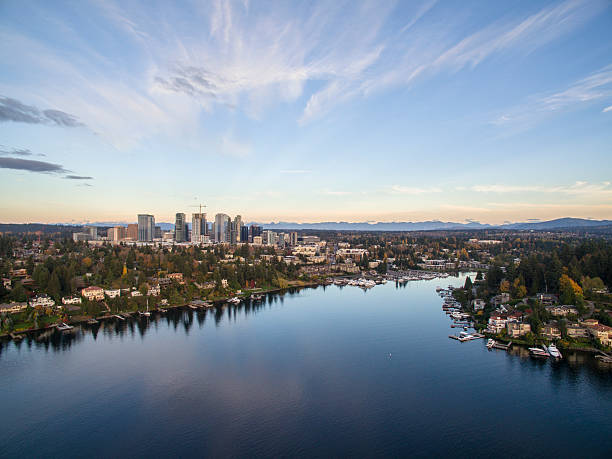

**King County, WA, U.S.A.**  

# Housing Guidance for King County, WA, U.S.A

* Student name: Vi Bui
* Student pace: Part-Time
* Scheduled project review date/time: 10/xx/21
* Instructor name: Claude Fried
* Blog post URL: https://datasciish.com/

## Overview

**Client:** New WA state home buyers needing consultation on WA real estate market and expectations (price, size, location) 

**Data, Methodology, and Analysis:** King County (WA, U.S.A.) housing data from 2014-2015

**Results & Recommendations:** After analyzing data and building models assessing relationships between price and square feet; price and bedrooms; and price to zip code, we've modeled the expectations for price range depending on square feet of living space, number of bedrooms, and number of bathrooms

# Data Exploration, Cleansing, Visualization, and Preparation

**Data Exploration** <br>
Explore King County, WA, U.S.A. data from years 2014-2015

**Data Cleansing** <br>
Check for duplicates (none); drop NaN values and unnecessary columns; continuously clean data as necessary 

**Data Visualization** <br>
Use visualizations to explore the data and determine how to further refine the dataset in order to prepare for modeling 

**Data Preparation** <br>

## Data Exploration and Cleansing
Import data and all packages needed for data exploration and modeling 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import os 
import warnings

Explore: columns, shape, info 

In [2]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Explore number of entries; which columns have missing data; and data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [4]:
# Check for duplicates 

df.duplicated(keep='first').sum()

0

In [5]:
# Check for NaN values 

df.isna().sum()

# Columns and number of respective NaN values 
# waterfront       2376
# view               63
# yr_renovated     3842

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Explore columns 

df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Understand Column Names and Descriptions for King County's Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [7]:
# Calculate the percentage of NaN 

df['waterfront'].value_counts()

# Ask Claude how to do this "smarter": (19075/(19075+146))
# (2376+19075)/(2376+19075+146)

0.0    19075
1.0      146
Name: waterfront, dtype: int64

**Observations after exploring waterfront data:** 
- 99.2% of houses (146 out of 19,221) do not have a waterfront view
- With 2376 entries with NaN values, imputing the NaN values to 0 makes no material difference 
- Clean data: impute waterfront NaN values to 0 (represents no waterfront view) 
- Resulting data: 99.3% of houses (21,451 out of 21,597) do not have a waterfront view 

In [8]:
# Impute waterfront NaN values to 0 

df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [9]:
# Double check for NaN values left 

df['waterfront'].isna().sum()

0

In [10]:
# Continue exploring other data that needs to be cleansed 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [11]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

**'yr_renovated' data needs to be cleansed. Observations about 'yr_renovated':** 

- 'yr_renovated' has 3842 NaN values 
- About the data: if house has been renovated, the year is entered. If not, 0 has been entered 
- 95.8% of current data set (17,011 of 17,755 houses) have not been renovated
- Imputing the 3842 NaN values to 0 (not renovated) does not make a substantial difference  
- Resulting data: 96.6% of new data set (20,853 of 21,597 houses) have not been renovated  

In [12]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
# ask Claude how you would get the sum of the value counts 
# df['yr_renovated'].value_counts('0')
20853/21597

0.9655507709404084

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


**'sqft_basement' data needs to be cleansed. Observations about 'sqft_basement':** 

- Ran into an error with 'sqft_basement' data
- Found there are 454 entries with '?' symbols in the data
- 60.7% of current data set (12,826 of 21,143 houses) have 0 as entered for sqft_basement
- Imputing the 454 '?' entries to 0 does not make a substantial difference  
- Resulting data: 61.5% of new data set (13,280 of 21,597 houses) have 0 sqft_basement

In [15]:
# Check how many entries for 'sqft_basement' are '?'
# Ask Claude how to view the entire data set for sqft_basement

df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
768.0         1
2050.0        1
2490.0        1
1284.0        1
2180.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
# Impute 454 '?' entries to 0 values 
# Transform data type from object to float 

df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == '?' else x).astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

**Continue cleaning data/transform data types:** 
- Transform data types
- Most importantly, convert zipcode from integer to string

In [18]:
# yr_renovated from float to integer (preference) 
# zipcode from integer to string 

df['yr_renovated'] = (df['yr_renovated'].astype(int))
df['zipcode'] = (df['zipcode'].astype(str))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  object 
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

## Create New Features 

1. Year Sold (from date column) 
2. Renovated (make renovated a binary value: renovated = 1; not renovated = 0)
3. Basement Present (make basement a binary value: renovated = 1; not renovated = 0)
4. Actual Age of Property (year sold - year built) 
5. Bathrooms Per Bedroom (bathrooms/bedrooms)
6. Square Feet Living to Square Foot Lot (sqft_living/sqft_lot)

In [20]:
# Create new features 

df['yr_sold'] = (df['date'].str[-4:].astype(int))
df['renovated'] = np.where(df['yr_renovated']!=0, 1,0)
df['basement_present'] = np.where(df['sqft_basement']!=0, 1,0)
df['actual_age_of_property'] = df['yr_sold']-df['yr_built']
df['bathrooms_per_bedroom'] = df['bathrooms']/df['bedrooms']
df['sqft_living_to_sqft_lot'] = df['sqft_living']/df['sqft_lot'] 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,47.5112,-122.257,1340,5650,2014,0,0,59,0.333333,0.208850
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,47.7210,-122.319,1690,7639,2014,1,1,63,0.750000,0.354874
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,47.7379,-122.233,2720,8062,2015,0,0,82,0.500000,0.077000
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,47.5208,-122.393,1360,5000,2014,0,1,49,0.750000,0.392000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,47.6168,-122.045,1800,7503,2015,0,0,28,0.666667,0.207921


In [21]:
# Check: data types
# Check: all value counts match 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     21597 non-null  object 
 1   price                    21597 non-null  float64
 2   bedrooms                 21597 non-null  int64  
 3   bathrooms                21597 non-null  float64
 4   sqft_living              21597 non-null  int64  
 5   sqft_lot                 21597 non-null  int64  
 6   floors                   21597 non-null  float64
 7   waterfront               21597 non-null  float64
 8   view                     21534 non-null  float64
 9   condition                21597 non-null  int64  
 10  grade                    21597 non-null  int64  
 11  sqft_above               21597 non-null  int64  
 12  sqft_basement            21597 non-null  float64
 13  yr_built                 21597 non-null  int64  
 14  yr_renov

In [22]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'renovated',
       'basement_present', 'actual_age_of_property', 'bathrooms_per_bedroom',
       'sqft_living_to_sqft_lot'],
      dtype='object')

In [23]:
# Explore correlation for numerical values with .corr()

df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.395734,0.036056,0.667951,...,0.306692,0.022036,0.585241,0.082845,0.003727,0.117543,0.178264,-0.053890,0.281227,0.123063
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078523,0.026496,0.356563,...,-0.009951,0.132054,0.393406,0.030690,-0.009949,0.017635,0.158412,-0.155817,-0.236129,0.026798
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186451,-0.126479,0.665838,...,0.024280,0.224903,0.569884,0.088303,-0.026577,0.046742,0.159863,-0.507561,0.652668,0.287015
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.282532,-0.059445,0.762779,...,0.052155,0.241214,0.756402,0.184342,-0.029014,0.050829,0.201198,-0.318592,0.310690,0.076988
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075298,-0.008830,0.114731,...,-0.085514,0.230227,0.144763,0.718204,0.005628,0.005091,-0.034889,-0.052853,0.063306,-0.252601
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028436,-0.264075,0.458794,...,0.049239,0.125943,0.280102,-0.010722,-0.022352,0.003713,-0.252465,-0.489514,0.421169,0.556700
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.382000,0.016648,0.082818,...,-0.012157,-0.037628,0.083823,0.030658,-0.005018,0.074267,0.039220,0.024406,0.073760,-0.029806
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,...,0.006141,-0.077894,0.279561,0.073332,0.001504,0.090465,0.177478,0.054584,0.131381,-0.002310
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045735,1.000000,-0.146896,...,-0.015102,-0.105877,-0.093072,-0.003126,-0.045898,-0.055383,0.130542,0.360836,-0.158662,-0.156501
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249727,-0.146896,1.000000,...,0.113575,0.200341,0.713867,0.120981,-0.030635,0.015259,0.050701,-0.448322,0.409125,0.191398


In [24]:
# Explore descriptive statistics with .describe()
# Summarizes central tendency (mean), dispersion and shape of a dataset’s distribution, excluding NaN values

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,...,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,0.034449,0.38510,43.323286,0.640969,0.323755
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,...,0.138552,0.140724,685.230472,27274.441950,0.467619,0.182384,0.48663,29.377285,0.211651,0.268460
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.00000,-1.000000,0.053030,0.000610
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,0.000000,0.00000,18.000000,0.500000,0.156663
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,0.000000,0.00000,40.000000,0.625000,0.247666
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,0.000000,1.00000,63.000000,0.750000,0.407609
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,1.000000,1.00000,115.000000,2.500000,4.653846


In [25]:
# Explore distribution (value_counts) of bedroom data 

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## Data Visualization 

<Figure size 864x576 with 0 Axes>

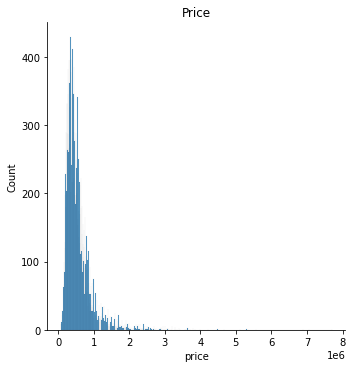

In [26]:
plt.figure(figsize=(12,8))
sns.displot(df['price'],bins=1000)
plt.title('Price')
plt.show();

<AxesSubplot:xlabel='price'>

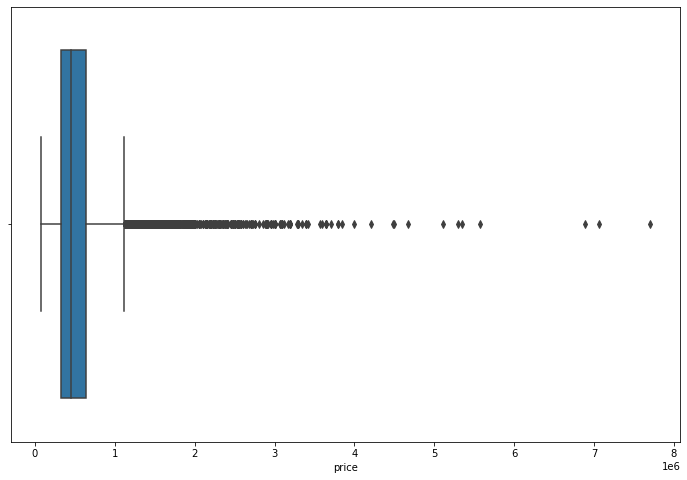

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='price', data=df, ax=ax)

<Figure size 864x576 with 0 Axes>

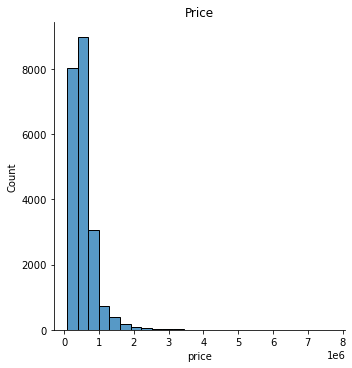

In [28]:
plt.figure(figsize=(12,8))
sns.displot(df['price'],bins=25)
plt.title('Price')
plt.show();

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,...,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,0.034449,0.38510,43.323286,0.640969,0.323755
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,...,0.138552,0.140724,685.230472,27274.441950,0.467619,0.182384,0.48663,29.377285,0.211651,0.268460
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.00000,-1.000000,0.053030,0.000610
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,0.000000,0.00000,18.000000,0.500000,0.156663
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,0.000000,0.00000,40.000000,0.625000,0.247666
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,0.000000,1.00000,63.000000,0.750000,0.407609
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,1.000000,1.00000,115.000000,2.500000,4.653846


Narrow price range to \\$175,000-\\$650,000

In [30]:
# Ask Claude how to find where the "majority" of thd prices fall 

df = df[df['price'].between(175_000,650_000)]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15993 entries, 7129300520 to 1523300157
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     15993 non-null  object 
 1   price                    15993 non-null  float64
 2   bedrooms                 15993 non-null  int64  
 3   bathrooms                15993 non-null  float64
 4   sqft_living              15993 non-null  int64  
 5   sqft_lot                 15993 non-null  int64  
 6   floors                   15993 non-null  float64
 7   waterfront               15993 non-null  float64
 8   view                     15949 non-null  float64
 9   condition                15993 non-null  int64  
 10  grade                    15993 non-null  int64  
 11  sqft_above               15993 non-null  int64  
 12  sqft_basement            15993 non-null  float64
 13  yr_built                 15993 non-null  int64  
 14  yr_renov

In [32]:
# Percentage of data that will be used 

15_993/21_597

0.7405195165995277

<Figure size 864x576 with 0 Axes>

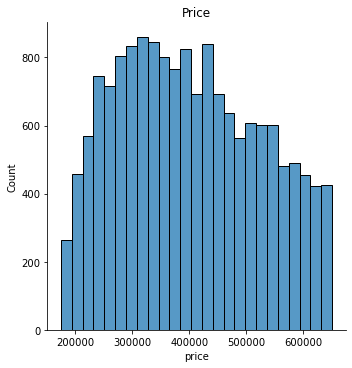

In [33]:
plt.figure(figsize=(12,8))
sns.displot(df['price'],bins=25)
plt.title('Price')
plt.show();

In [34]:
# Explore the data - specifically at bedrooms, bathrooms, and sqft_living

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
count,15993.000000,15993.000000,15993.000000,15993.000000,1.599300e+04,15993.000000,15993.000000,15949.000000,15993.000000,15993.000000,...,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000
mean,400987.591009,3.244982,1.953667,1800.124742,1.317614e+04,1.431533,0.001438,0.109411,3.397174,7.301132,...,47.543802,-122.217163,1792.705246,11677.541987,2014.323517,0.024136,0.359720,43.468142,0.619331,0.312434
std,123893.841894,0.886582,0.660056,631.746037,3.310214e+04,0.537112,0.037897,0.500945,0.634151,0.831989,...,0.148391,0.141616,496.582637,24240.185920,0.467833,0.153475,0.479933,28.270545,0.206016,0.271903
min,175000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000,-1.000000,0.053030,0.000610
25%,299950.000000,3.000000,1.500000,1330.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.431000,-122.332000,1430.000000,5040.000000,2014.000000,0.000000,0.000000,20.000000,0.500000,0.152857
50%,392000.000000,3.000000,2.000000,1720.000000,7.439000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.545900,-122.247000,1710.000000,7500.000000,2014.000000,0.000000,0.000000,41.000000,0.583333,0.232076
75%,499990.000000,4.000000,2.500000,2180.000000,9.968000e+03,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.682700,-122.133000,2090.000000,9601.000000,2015.000000,0.000000,1.000000,62.000000,0.750000,0.370000
max,650000.000000,33.000000,7.500000,5461.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,11.000000,...,47.777600,-121.319000,4362.000000,438213.000000,2015.000000,1.000000,1.000000,115.000000,2.500000,2.291399


In [35]:
# Explore correlation after narrowing data set 

df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
price,1.000000,0.176433,0.315515,0.417273,0.071915,0.200133,0.022750,0.126625,-0.003818,0.451436,...,0.479098,0.054300,0.382913,0.067769,0.007087,0.027333,0.174533,-0.040202,0.184907,0.188304
bedrooms,0.176433,1.000000,0.456624,0.589010,0.020603,0.102590,-0.038404,0.008418,0.020562,0.256539,...,-0.107569,0.132547,0.342631,0.015451,-0.009127,-0.008531,0.138967,-0.162862,-0.306894,-0.024121
bathrooms,0.315515,0.456624,1.000000,0.666310,0.023810,0.492458,-0.029209,0.038959,-0.161222,0.557766,...,-0.112134,0.232980,0.478078,0.024263,-0.027191,-0.013034,0.121556,-0.594414,0.638663,0.328013
sqft_living,0.417273,0.589010,0.666310,1.000000,0.132353,0.268110,-0.011641,0.109977,-0.076913,0.586257,...,-0.143029,0.256092,0.682108,0.143713,-0.024446,-0.001096,0.200849,-0.353860,0.181322,0.050878
sqft_lot,0.071915,0.020603,0.023810,0.132353,1.000000,-0.052962,0.021022,0.105113,0.015127,0.034926,...,-0.107369,0.217447,0.152715,0.712409,-0.006834,0.018080,-0.020799,-0.005201,0.005793,-0.257394
floors,0.200133,0.102590,0.492458,0.268110,-0.052962,1.000000,-0.015131,-0.030150,-0.291827,0.424865,...,-0.017537,0.105360,0.204379,-0.057095,-0.018975,-0.021294,-0.292454,-0.547963,0.435363,0.610488
waterfront,0.022750,-0.038404,-0.029209,-0.011641,0.021022,-0.015131,1.000000,0.265469,0.020465,-0.021669,...,-0.036257,-0.055569,0.000292,0.046424,-0.005082,0.047788,0.009374,0.036551,0.006884,-0.031985
view,0.126625,0.008418,0.038959,0.109977,0.105113,-0.030150,0.265469,1.000000,0.021241,0.075946,...,-0.073858,-0.053688,0.138863,0.106203,0.010493,0.016915,0.093483,0.060348,0.036357,-0.040835
condition,-0.003818,0.020562,-0.161222,-0.076913,0.015127,-0.291827,0.020465,0.021241,1.000000,-0.198612,...,-0.035918,-0.063308,-0.134264,0.024193,-0.047841,-0.044530,0.086716,0.332479,-0.180666,-0.204763
grade,0.451436,0.256539,0.557766,0.586257,0.034926,0.424865,-0.021669,0.075946,-0.198612,1.000000,...,-0.035509,0.172615,0.559089,0.041749,-0.030212,-0.047129,0.015753,-0.536056,0.352979,0.261955


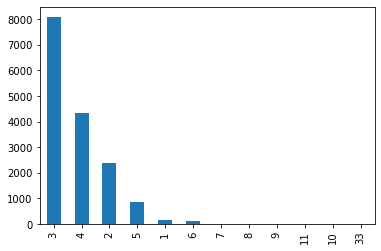

In [36]:
df['bedrooms'].value_counts().plot(kind='bar')
sns.despine;

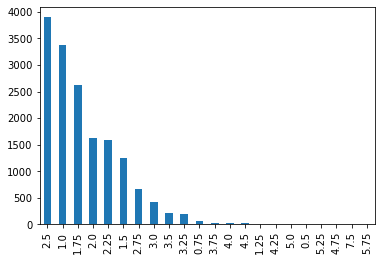

In [37]:
df['bathrooms'].value_counts().plot(kind='bar')
sns.despine;

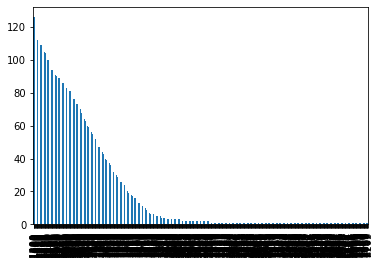

In [38]:
df['sqft_living'].value_counts().plot(kind='bar')
sns.despine;

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

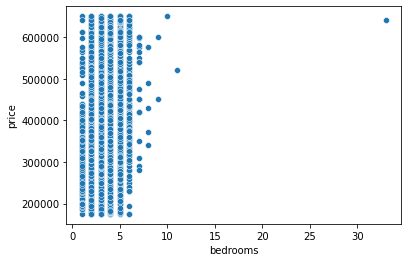

In [39]:
sns.scatterplot(data=df, x='bedrooms', y='price')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

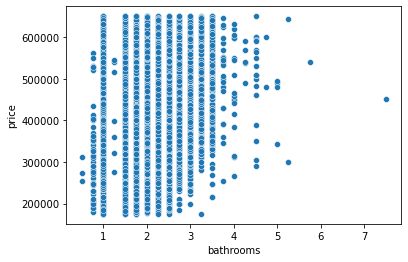

In [40]:
sns.scatterplot(data=df, x='bathrooms', y='price')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

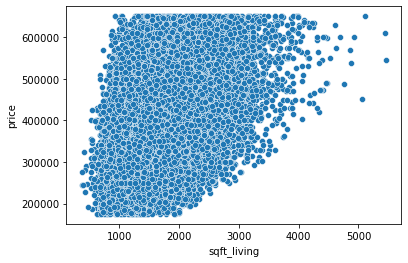

In [41]:
sns.scatterplot(data=df, x='sqft_living', y='price')

After seeing outliers in the data, refine data set to: 
1. bedrooms to 6 or less 
2. sqft_living to 4000 or less 

In [42]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
count,15993.000000,15993.000000,15993.000000,15993.000000,1.599300e+04,15993.000000,15993.000000,15949.000000,15993.000000,15993.000000,...,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000,15993.000000
mean,400987.591009,3.244982,1.953667,1800.124742,1.317614e+04,1.431533,0.001438,0.109411,3.397174,7.301132,...,47.543802,-122.217163,1792.705246,11677.541987,2014.323517,0.024136,0.359720,43.468142,0.619331,0.312434
std,123893.841894,0.886582,0.660056,631.746037,3.310214e+04,0.537112,0.037897,0.500945,0.634151,0.831989,...,0.148391,0.141616,496.582637,24240.185920,0.467833,0.153475,0.479933,28.270545,0.206016,0.271903
min,175000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000,-1.000000,0.053030,0.000610
25%,299950.000000,3.000000,1.500000,1330.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.431000,-122.332000,1430.000000,5040.000000,2014.000000,0.000000,0.000000,20.000000,0.500000,0.152857
50%,392000.000000,3.000000,2.000000,1720.000000,7.439000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.545900,-122.247000,1710.000000,7500.000000,2014.000000,0.000000,0.000000,41.000000,0.583333,0.232076
75%,499990.000000,4.000000,2.500000,2180.000000,9.968000e+03,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.682700,-122.133000,2090.000000,9601.000000,2015.000000,0.000000,1.000000,62.000000,0.750000,0.370000
max,650000.000000,33.000000,7.500000,5461.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,11.000000,...,47.777600,-121.319000,4362.000000,438213.000000,2015.000000,1.000000,1.000000,115.000000,2.500000,2.291399


In [43]:
df = df[df['bedrooms'] <= 6]
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
count,15965.000000,15965.000000,15965.000000,15965.000000,1.596500e+04,15965.00000,15965.000000,15921.000000,15965.000000,15965.000000,...,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000
mean,400835.351519,3.235766,1.951425,1797.901973,1.318139e+04,1.43135,0.001441,0.109415,3.397244,7.301159,...,47.543681,-122.217090,1792.784654,11683.813028,2014.323771,0.024053,0.359349,43.454056,0.619678,0.312278
std,123867.266044,0.835528,0.656015,629.416330,3.312958e+04,0.53716,0.037930,0.501092,0.634289,0.832428,...,0.148420,0.141673,496.817412,24259.422399,0.467928,0.153217,0.479825,28.274746,0.205890,0.271962
min,175000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000,-1.000000,0.125000,0.000610
25%,299900.000000,3.000000,1.500000,1330.000000,5.000000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,...,47.430300,-122.332000,1430.000000,5040.000000,2014.000000,0.000000,0.000000,20.000000,0.500000,0.152703
50%,392000.000000,3.000000,2.000000,1720.000000,7.434000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,...,47.545800,-122.247000,1710.000000,7500.000000,2014.000000,0.000000,0.000000,41.000000,0.583333,0.231818
75%,499950.000000,4.000000,2.500000,2180.000000,9.966000e+03,2.00000,0.000000,0.000000,4.000000,8.000000,...,47.682700,-122.133000,2091.000000,9603.000000,2015.000000,0.000000,1.000000,62.000000,0.750000,0.369718
max,650000.000000,6.000000,5.250000,5461.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,11.000000,...,47.777600,-121.319000,4362.000000,438213.000000,2015.000000,1.000000,1.000000,115.000000,2.500000,2.291399


In [44]:
df = df[df['sqft_living'] <= 4000]
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
count,15916.000000,15916.000000,15916.000000,15916.000000,1.591600e+04,15916.000000,15916.000000,15872.000000,15916.000000,15916.000000,...,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000
mean,400358.968145,3.232093,1.947427,1789.922971,1.310122e+04,1.430227,0.001445,0.107737,3.397525,7.295614,...,47.543950,-122.217231,1789.790211,11616.665117,2014.323699,0.024001,0.358193,43.512189,0.619281,0.312295
std,123707.148968,0.833128,0.652116,613.395670,3.301546e+04,0.536934,0.037988,0.496587,0.634433,0.825913,...,0.148286,0.141678,493.349512,24075.034143,0.467902,0.153057,0.479484,28.280040,0.205886,0.271939
min,175000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000,-1.000000,0.125000,0.000610
25%,299725.000000,3.000000,1.500000,1330.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.431400,-122.332000,1430.000000,5040.000000,2014.000000,0.000000,0.000000,20.000000,0.500000,0.152916
50%,390000.000000,3.000000,2.000000,1720.000000,7.420000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.546150,-122.248000,1710.000000,7500.000000,2014.000000,0.000000,0.000000,41.000000,0.583333,0.231807
75%,499900.000000,4.000000,2.500000,2180.000000,9.936000e+03,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.682700,-122.133000,2090.000000,9600.000000,2015.000000,0.000000,1.000000,62.000000,0.750000,0.369323
max,650000.000000,6.000000,5.250000,4000.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,11.000000,...,47.777600,-121.319000,4050.000000,438213.000000,2015.000000,1.000000,1.000000,115.000000,2.500000,2.291399


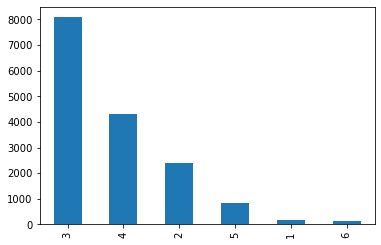

In [45]:
df['bedrooms'].value_counts().plot(kind='bar')
sns.despine;

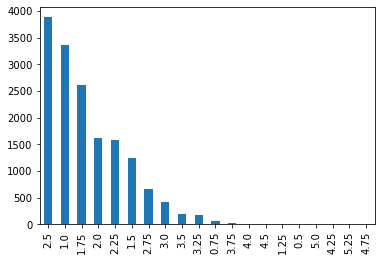

In [46]:
df['bathrooms'].value_counts().plot(kind='bar')
sns.despine;

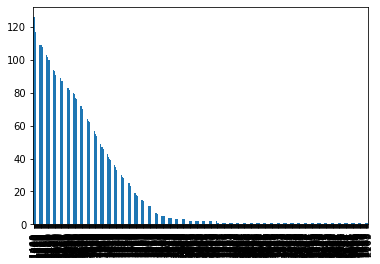

In [47]:
df['sqft_living'].value_counts().plot(kind='bar')
sns.despine;

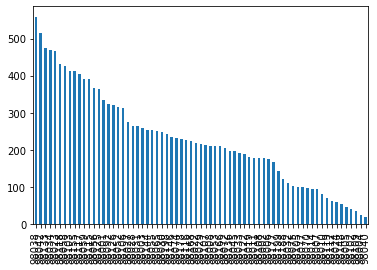

In [48]:
df['zipcode'].value_counts().plot(kind='bar')
sns.despine;

In [49]:
df['zipcode'].value_counts(ascending=True)

98040     19
98004     23
98109     35
98102     40
98005     47
        ... 
98023    466
98034    469
98133    475
98042    516
98038    559
Name: zipcode, Length: 69, dtype: int64

In [50]:
# For Future Work: explore correlation between these zip codes and price 
# least_houses_zip = df[df['zipcode' == '98004', '98109', '98112', '98102', '98119']]
# most_houses_zips = 98023, 98034, 98133, 98042, 98038

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

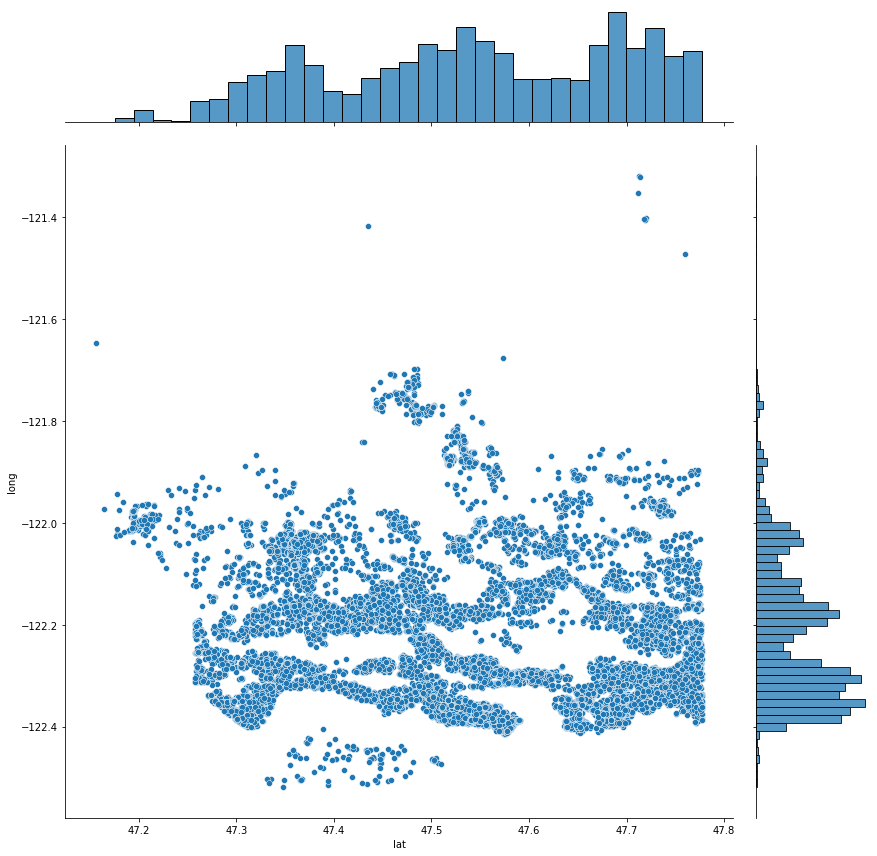

In [51]:
# For future work on zipcodes

plt.figure(figsize=(12,12))
sns.jointplot(x=df['lat'], y=df['long'], size=12)
plt.xlabel('Latitude', fontsize=11)
plt.ylabel('Longitude', fontsize=11)
plt.show()
sns.despine;

<AxesSubplot:xlabel='price'>

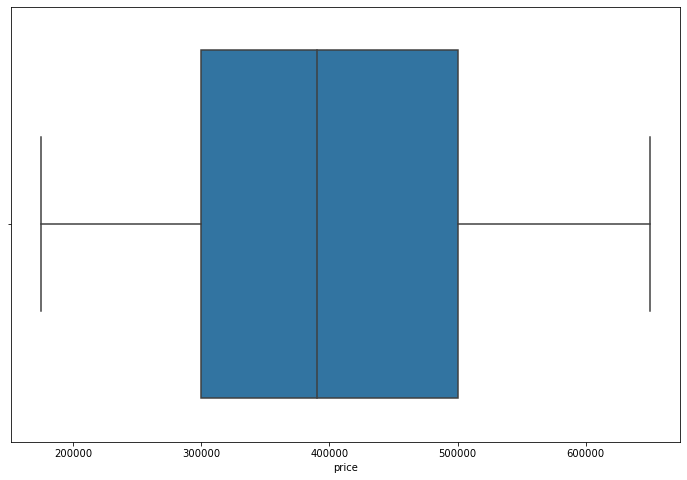

In [52]:
# Boxplot for price 

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='price', data=df, ax=ax)

<AxesSubplot:xlabel='bedrooms'>

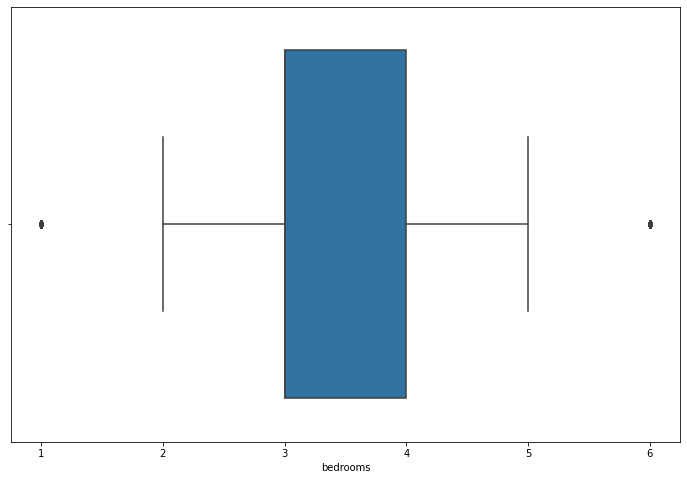

In [53]:
# Boxplot for bedrooms 

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='bedrooms', data=df, ax=ax)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

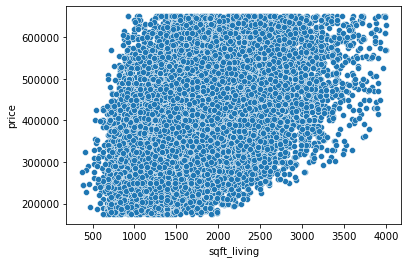

In [54]:
# Scatterplot for sqft_living and price

sns.scatterplot(data=df, x='sqft_living', y='price')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

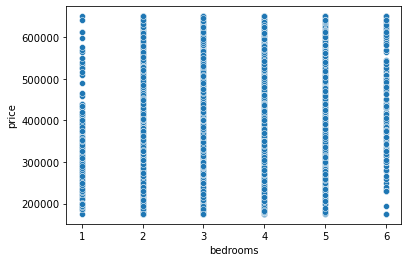

In [55]:
# Scatterplot for bedrooms and price

sns.scatterplot(data=df, x='bedrooms', y='price')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

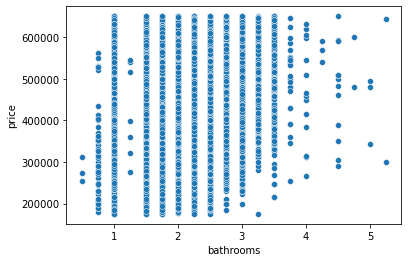

In [56]:
# Scatterplot for bathrooms and price

sns.scatterplot(data=df, x='bathrooms', y='price')

## Data Preparation 

Start dropping columns that will not be used 

In [57]:
# Will not use 'view' (# of times the house has been viewed) for analysis 

if 'view' in df.columns:
    df.drop('view', axis=1, inplace=True)

In [58]:
# Drop date 

if 'date' in df.columns:
    df.drop('date', axis=1, inplace=True)

### Create Target and Explore Data with More Visualizations

TARGET is price

In [59]:
TARGET = 'price'
X_VALS = [c for c in df.columns if c != TARGET]
TARGET in X_VALS

False

<Figure size 864x576 with 0 Axes>

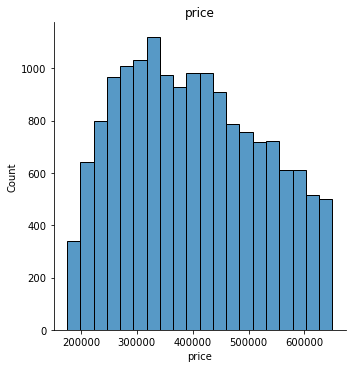

<Figure size 864x576 with 0 Axes>

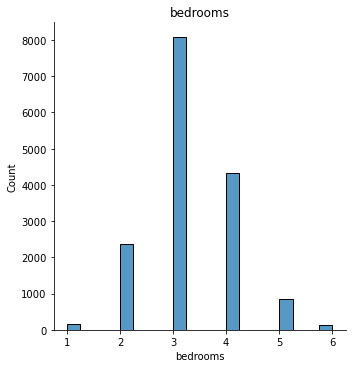

<Figure size 864x576 with 0 Axes>

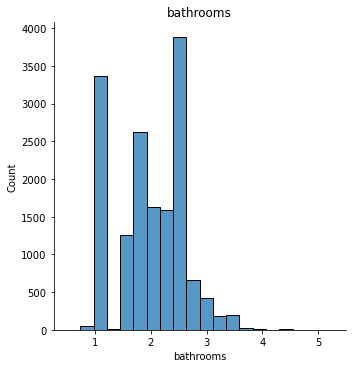

<Figure size 864x576 with 0 Axes>

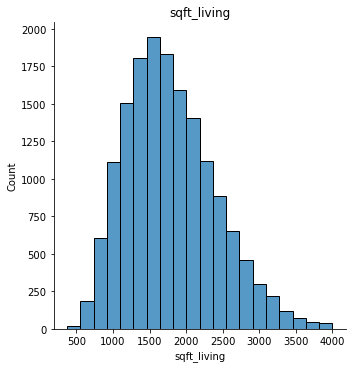

<Figure size 864x576 with 0 Axes>

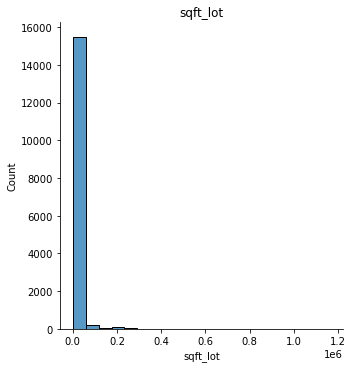

<Figure size 864x576 with 0 Axes>

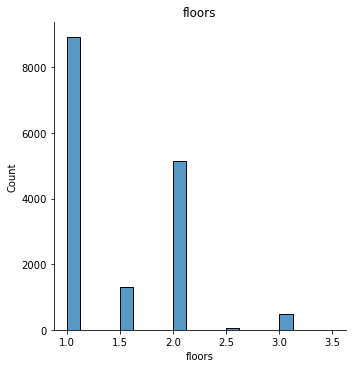

<Figure size 864x576 with 0 Axes>

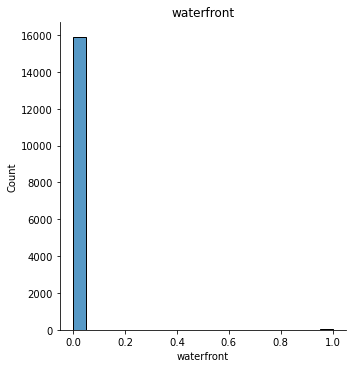

<Figure size 864x576 with 0 Axes>

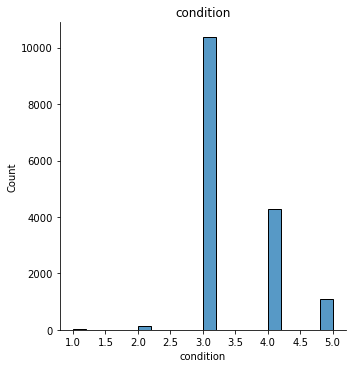

<Figure size 864x576 with 0 Axes>

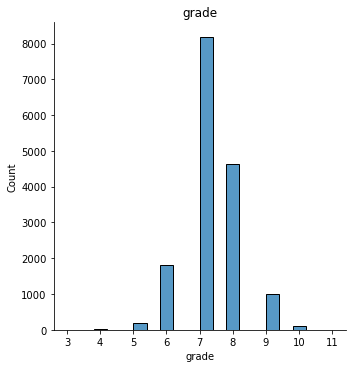

<Figure size 864x576 with 0 Axes>

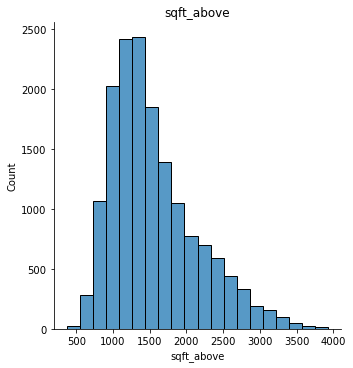

<Figure size 864x576 with 0 Axes>

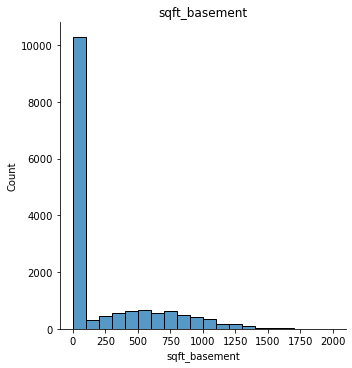

<Figure size 864x576 with 0 Axes>

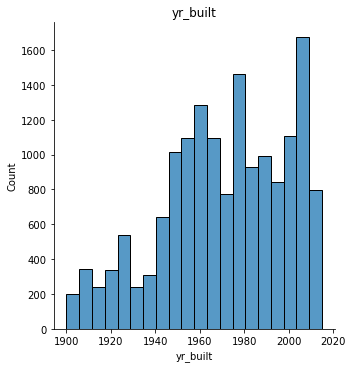

<Figure size 864x576 with 0 Axes>

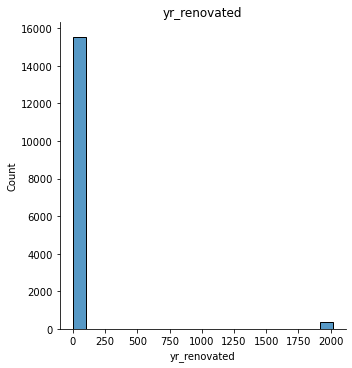

<Figure size 864x576 with 0 Axes>

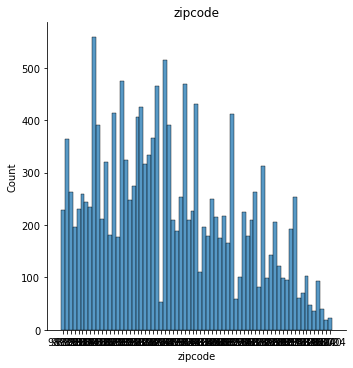

<Figure size 864x576 with 0 Axes>

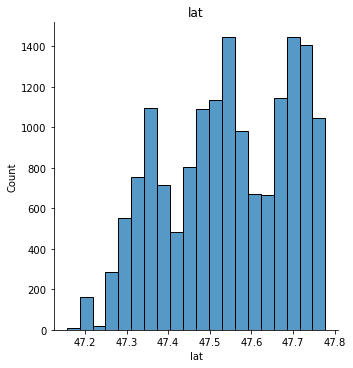

<Figure size 864x576 with 0 Axes>

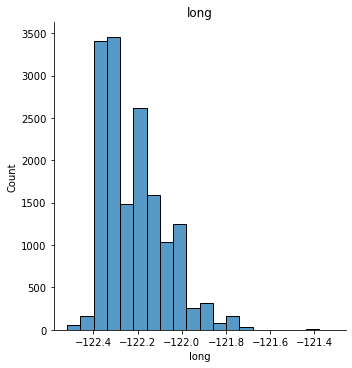

<Figure size 864x576 with 0 Axes>

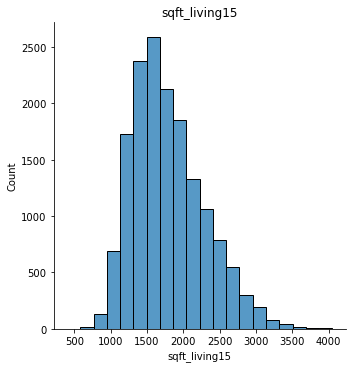

<Figure size 864x576 with 0 Axes>

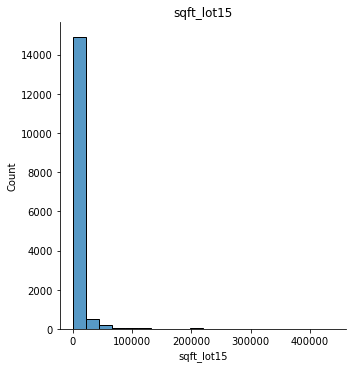

<Figure size 864x576 with 0 Axes>

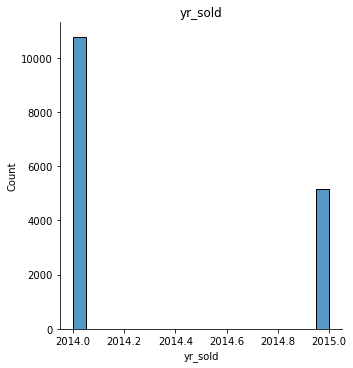

<Figure size 864x576 with 0 Axes>

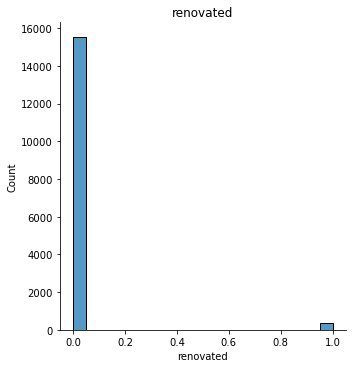

<Figure size 864x576 with 0 Axes>

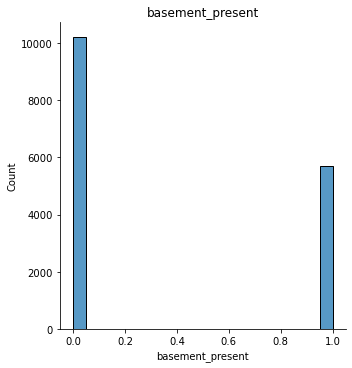

<Figure size 864x576 with 0 Axes>

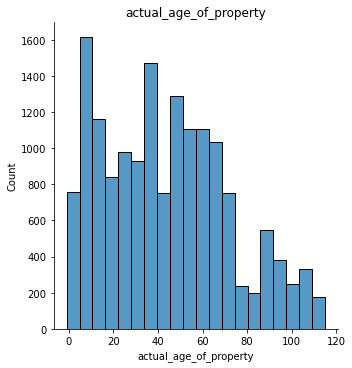

<Figure size 864x576 with 0 Axes>

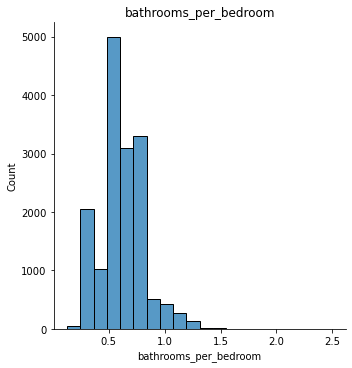

<Figure size 864x576 with 0 Axes>

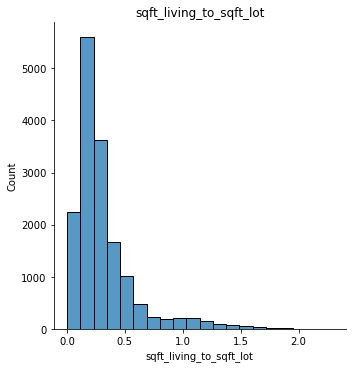

In [60]:
for col in df.columns:
    plt.figure(figsize=(12,8))
    sns.displot(df[col],bins=20)
    plt.title(col)
    plt.show();

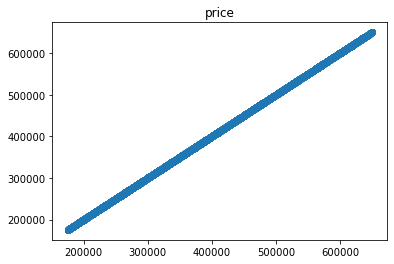

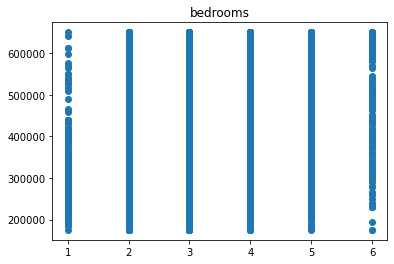

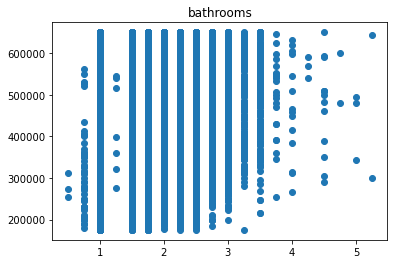

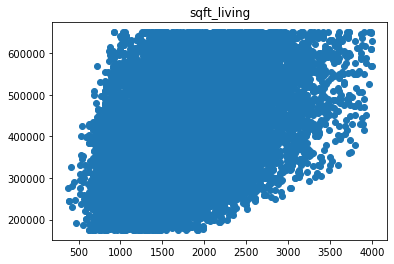

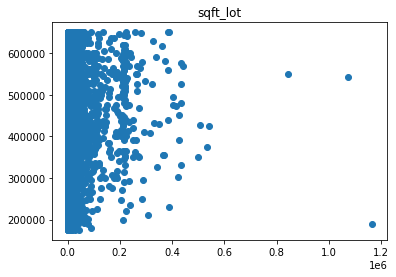

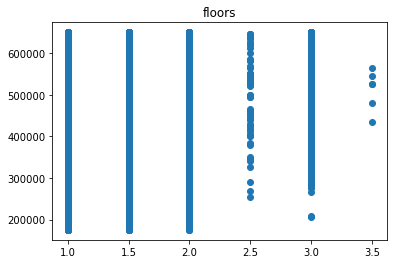

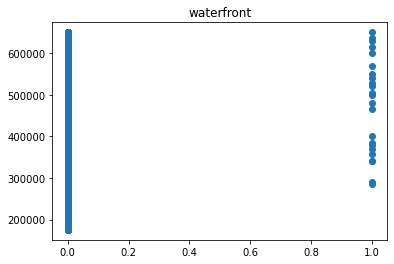

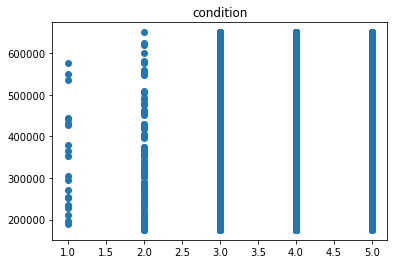

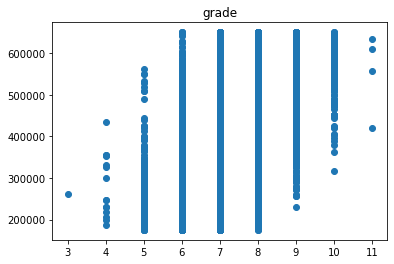

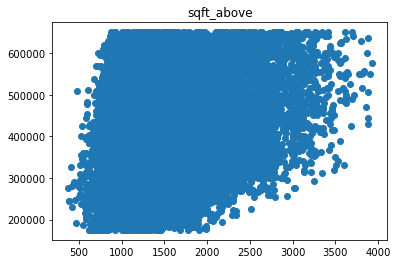

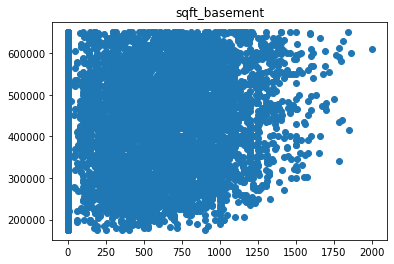

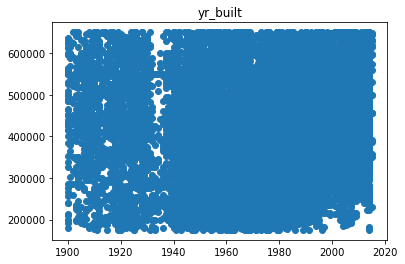

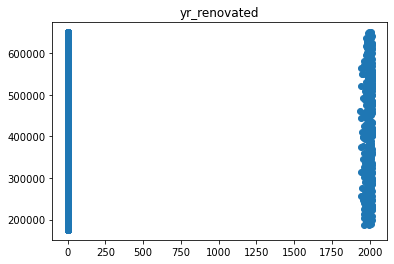

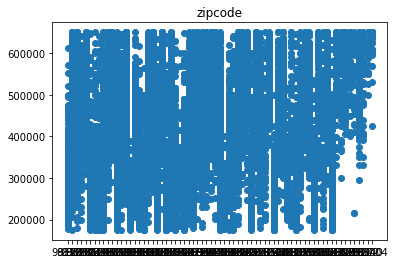

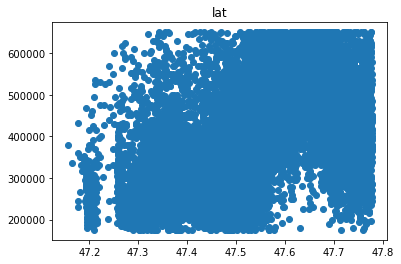

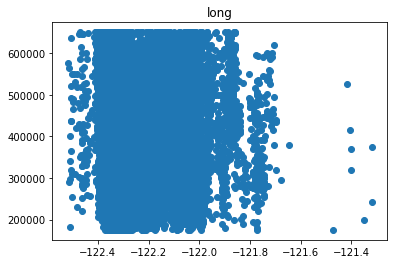

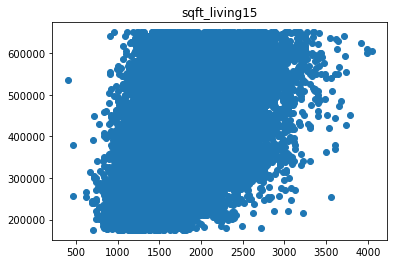

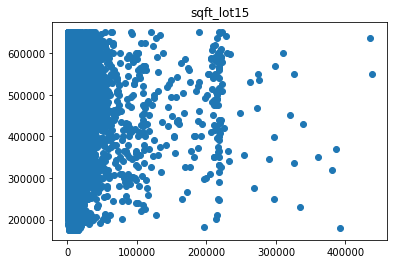

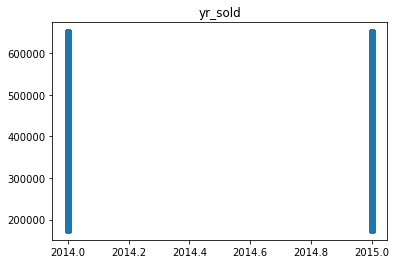

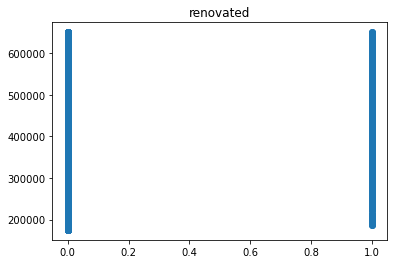

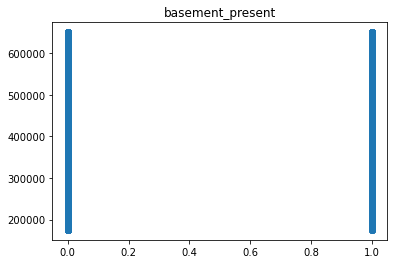

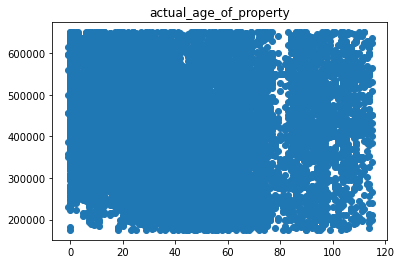

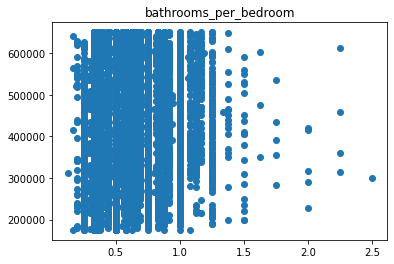

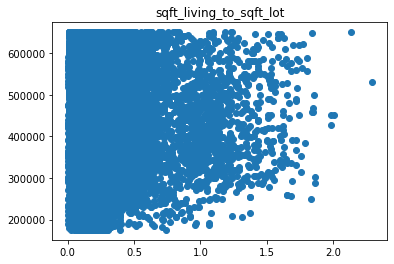

In [61]:
for col in df.columns:
    plt.scatter(df[col], df[TARGET])
    plt.title(col)
    plt.show()

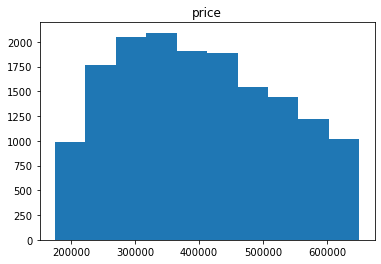

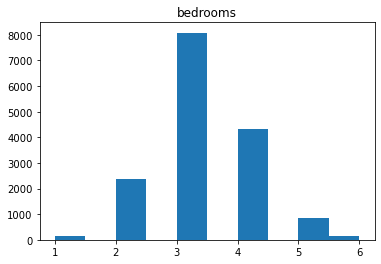

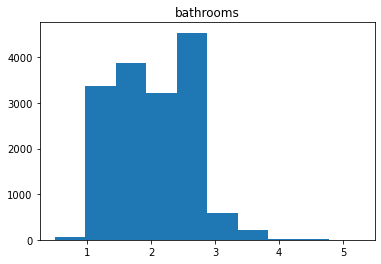

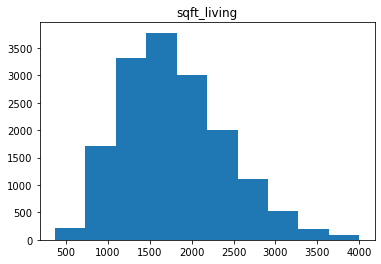

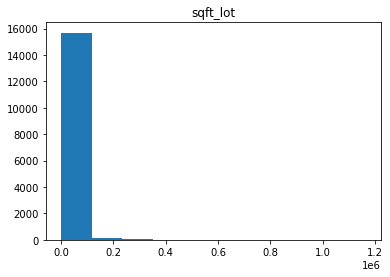

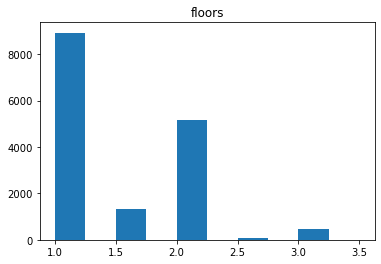

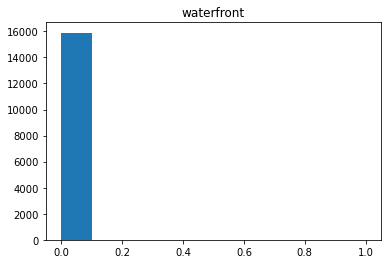

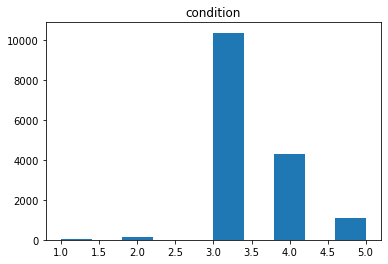

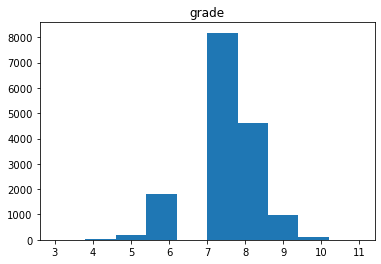

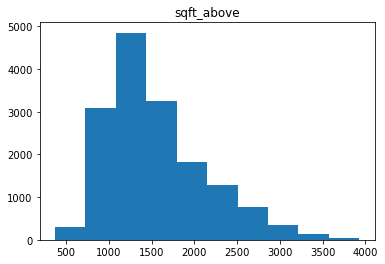

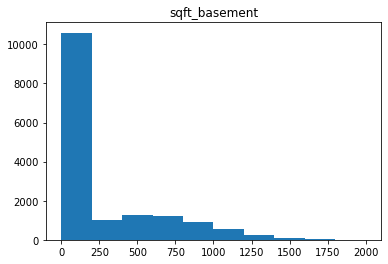

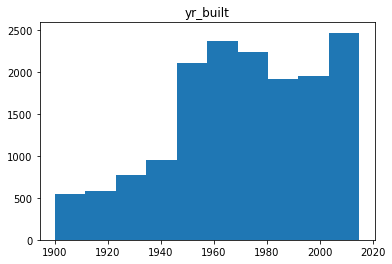

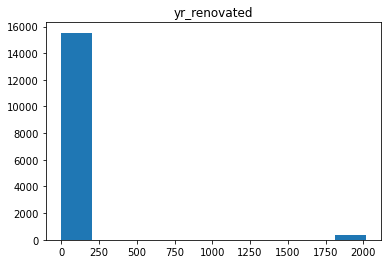

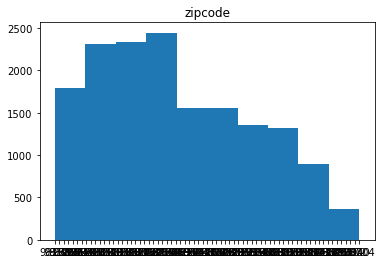

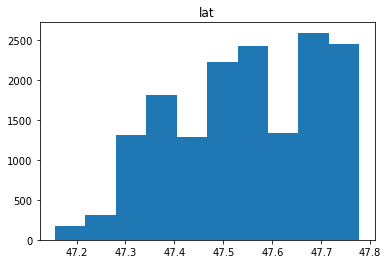

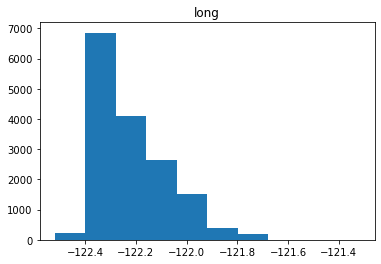

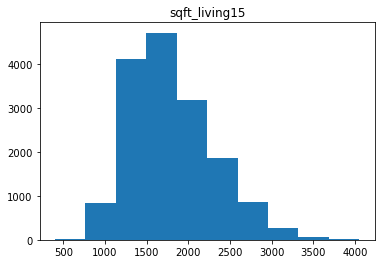

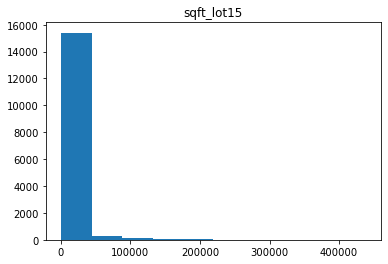

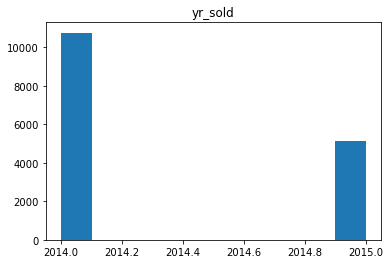

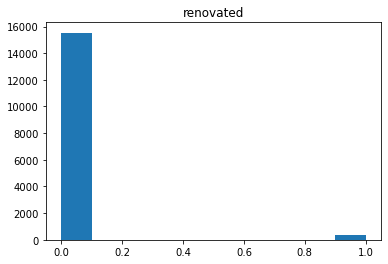

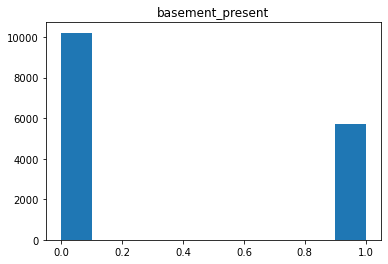

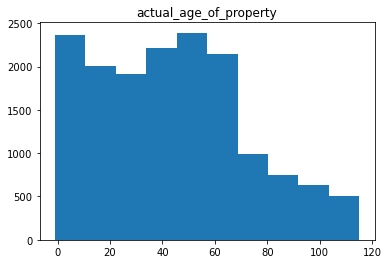

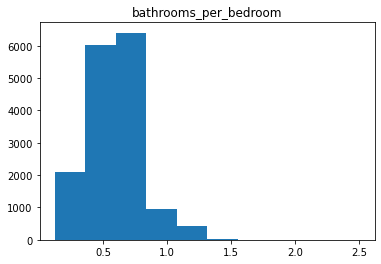

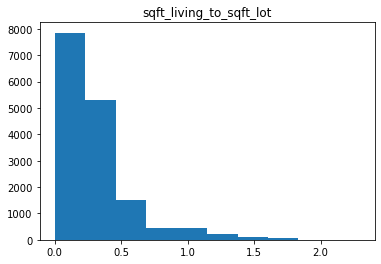

In [62]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

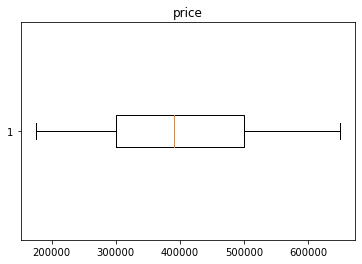

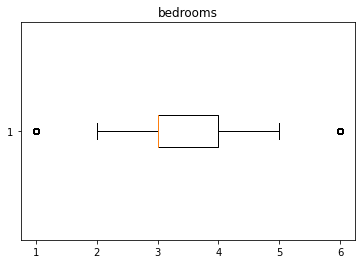

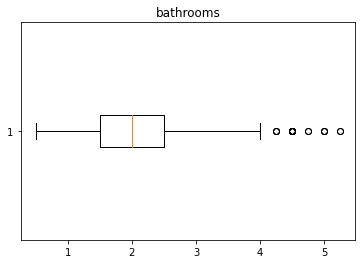

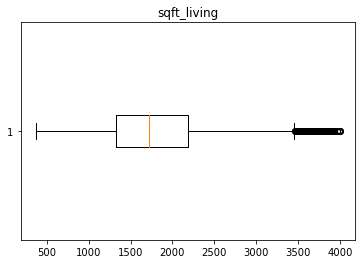

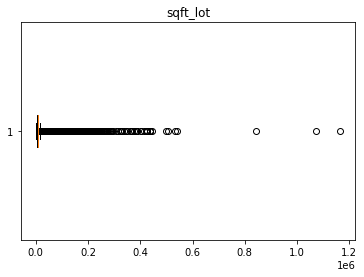

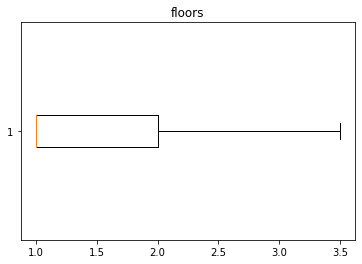

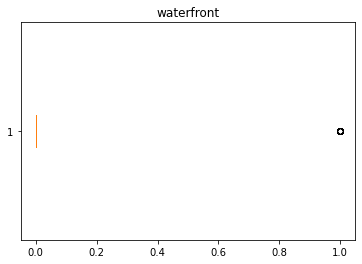

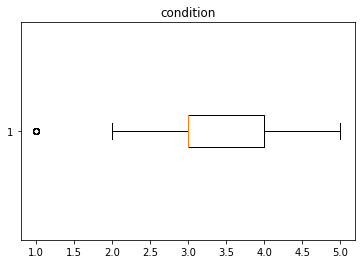

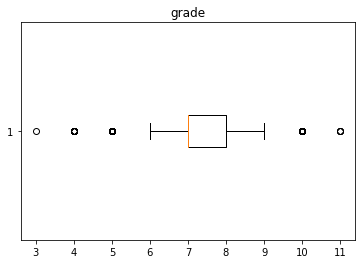

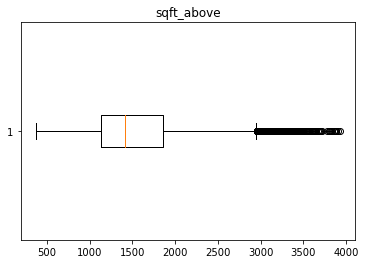

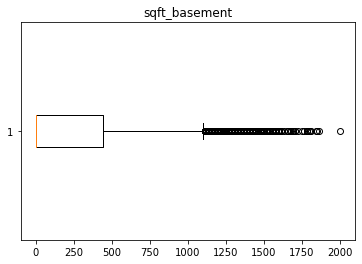

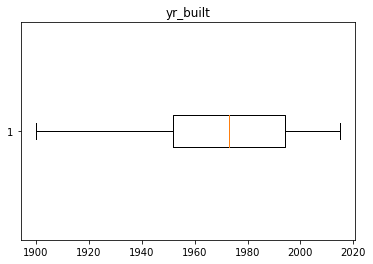

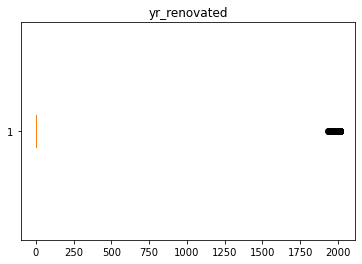

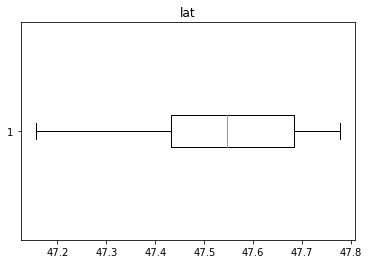

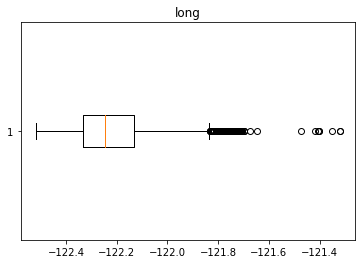

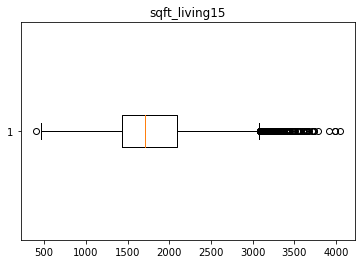

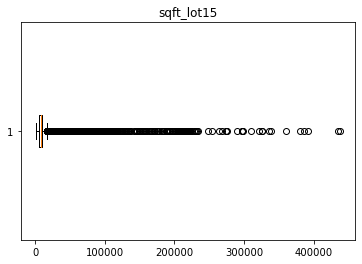

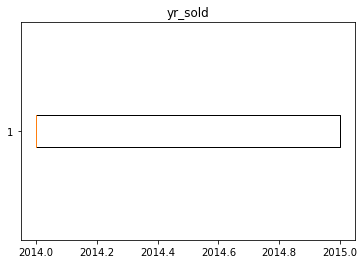

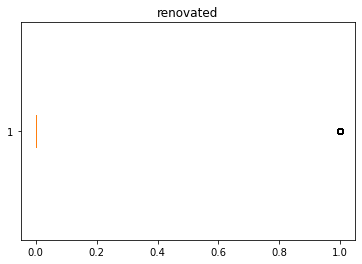

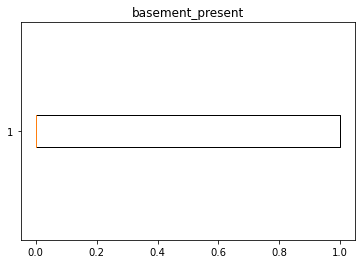

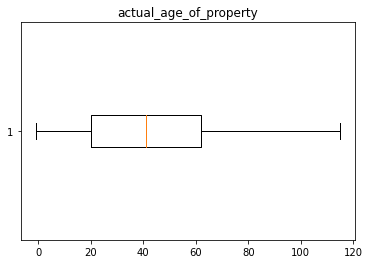

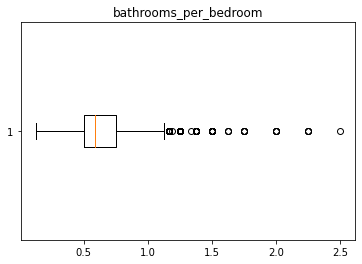

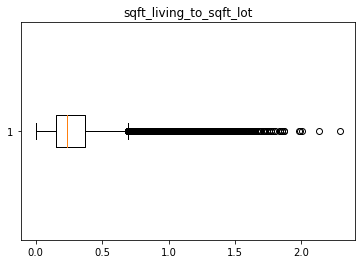

In [63]:
for col in df.select_dtypes('number').columns:
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.show()

<AxesSubplot:>

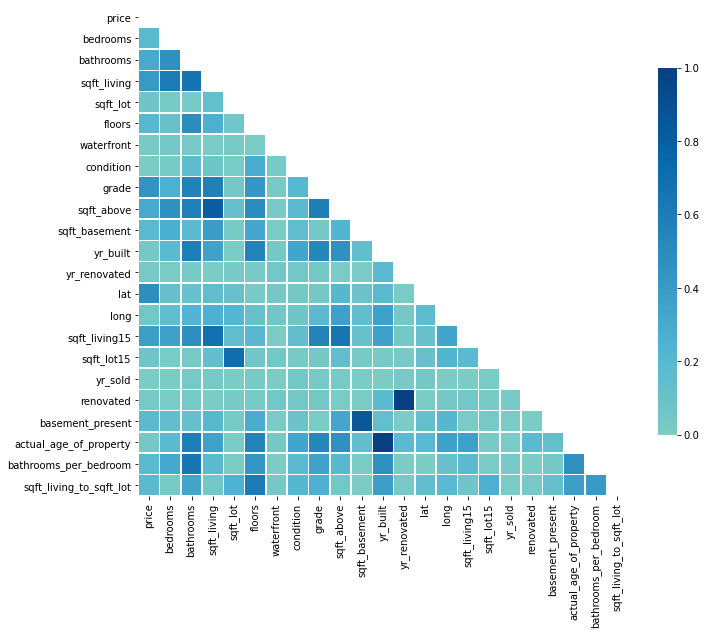

In [64]:
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="GnBu", vmin=0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

<AxesSubplot:>

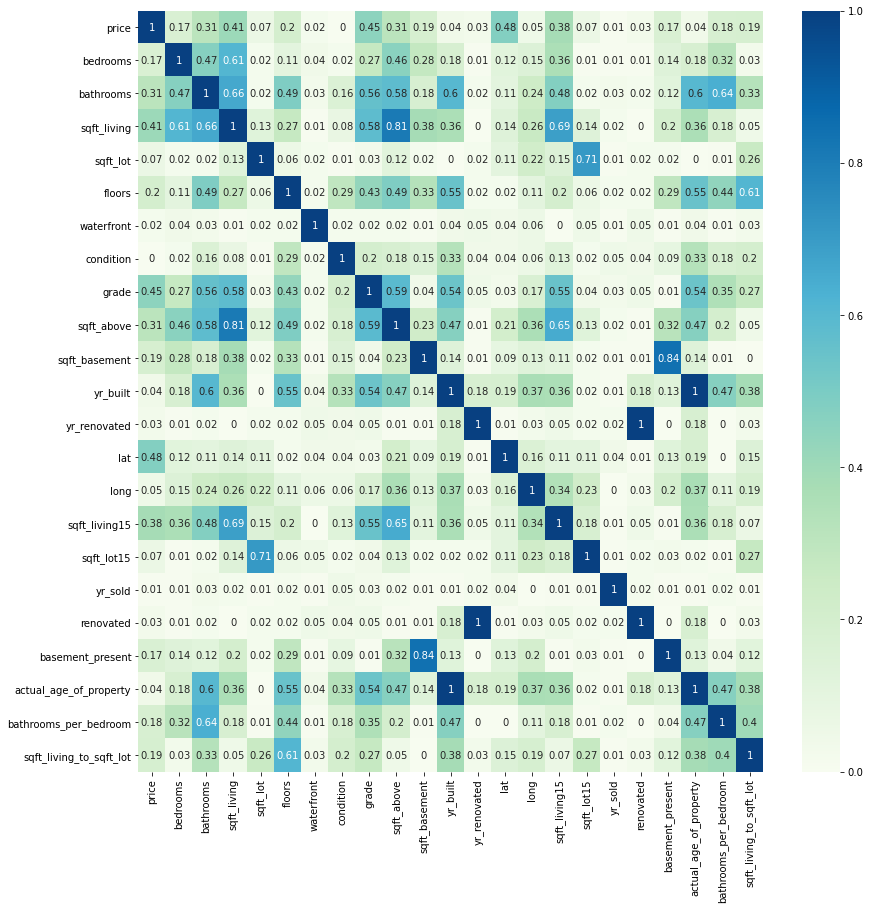

In [65]:
plt.figure(figsize=(14, 14))
corr_matrix = df.corr().abs().round(2)
sns.heatmap(data=corr_matrix,cmap="GnBu",annot=True)

In [66]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,...,47.5112,-122.257,1340,5650,2014,0,0,59,0.333333,0.208850
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,...,47.7210,-122.319,1690,7639,2014,1,1,63,0.750000,0.354874
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,...,47.7379,-122.233,2720,8062,2015,0,0,82,0.500000,0.077000
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,...,47.5208,-122.393,1360,5000,2014,0,1,49,0.750000,0.392000
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,...,47.6168,-122.045,1800,7503,2015,0,0,28,0.666667,0.207921


### Clean Data Before Modeling 
- drop sqft_basement, sqft_basement15, sqft_lot, sqft_lot15, yr_renovated
- drop longitude, latitude, 

In [67]:
if 'sqft_basement' in df.columns:
    df.drop('sqft_basement', axis=1, inplace=True)

In [68]:
if 'sqft_basement15' in df.columns:
    df.drop('sqft_basement15', axis=1, inplace=True)

In [69]:
if 'sqft_lot' in df.columns:
    df.drop('sqft_lot', axis=1, inplace=True)

In [70]:
if 'sqft_lot15' in df.columns:
    df.drop('sqft_lot15', axis=1, inplace=True)

In [71]:
if 'sqft_living15' in df.columns:
    df.drop('sqft_living15', axis=1, inplace=True)

In [72]:
if 'yr_renovated' in df.columns:
    df.drop('yr_renovated', axis=1, inplace=True)

In [73]:
if 'lat' in df.columns:
    df.drop('lat', axis=1, inplace=True)

In [74]:
if 'long' in df.columns:
    df.drop('long', axis=1, inplace=True)

In [75]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
id,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,1.0,0.0,3,7,1180,1955,98178,2014,0,0,59,0.333333,0.208850
6414100192,538000.0,3,2.25,2570,2.0,0.0,3,7,2170,1951,98125,2014,1,1,63,0.750000,0.354874
5631500400,180000.0,2,1.00,770,1.0,0.0,3,6,770,1933,98028,2015,0,0,82,0.500000,0.077000
2487200875,604000.0,4,3.00,1960,1.0,0.0,5,7,1050,1965,98136,2014,0,1,49,0.750000,0.392000
1954400510,510000.0,3,2.00,1680,1.0,0.0,3,8,1680,1987,98074,2015,0,0,28,0.666667,0.207921


<AxesSubplot:>

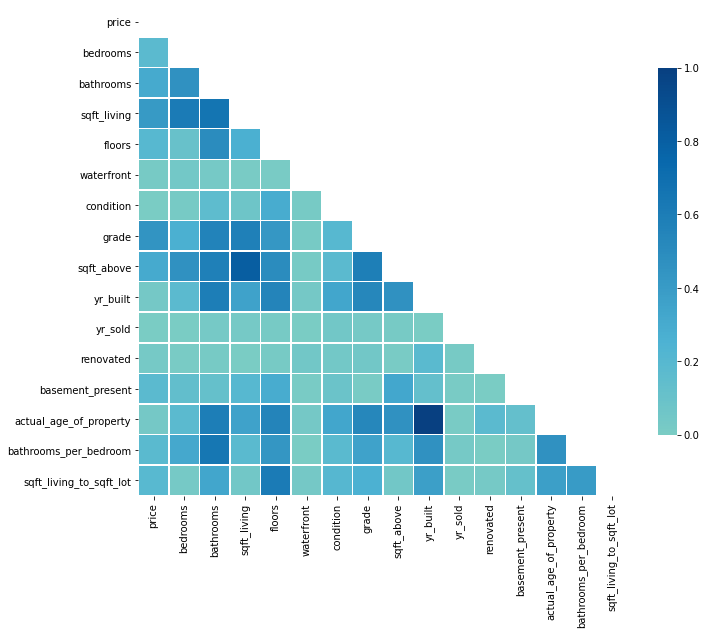

In [76]:
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="GnBu", vmin=0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

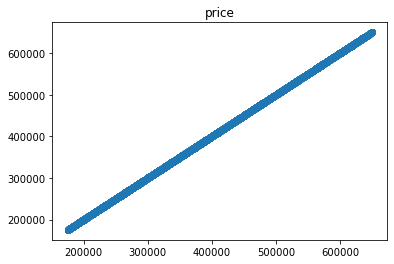

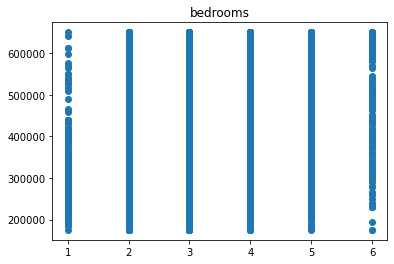

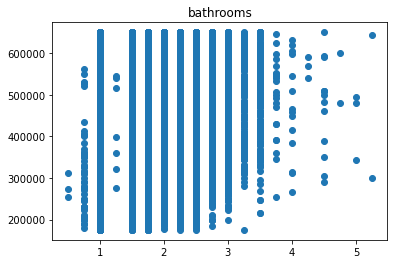

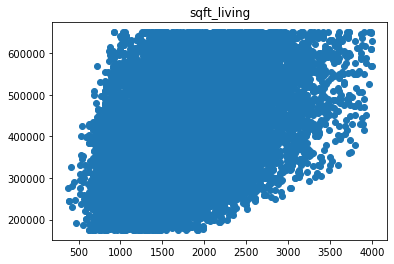

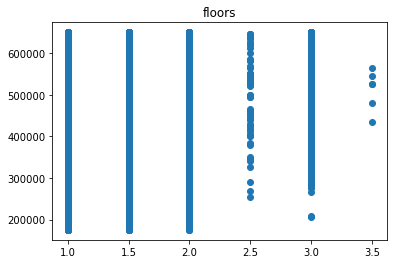

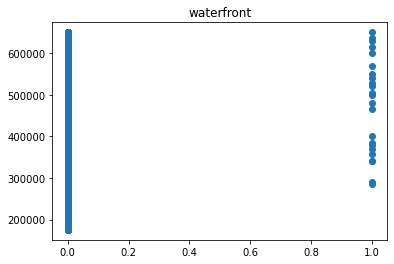

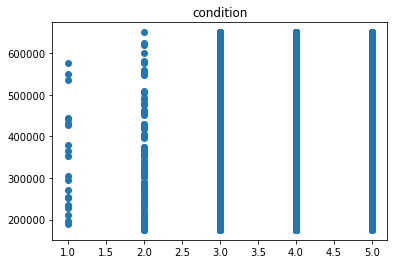

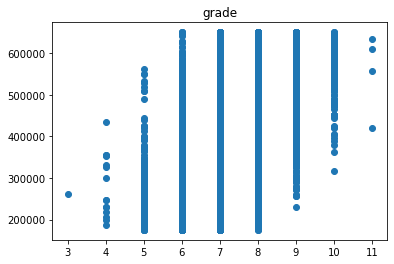

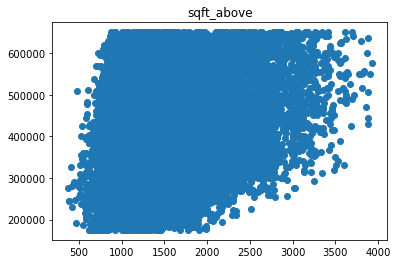

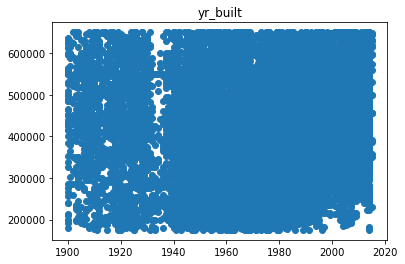

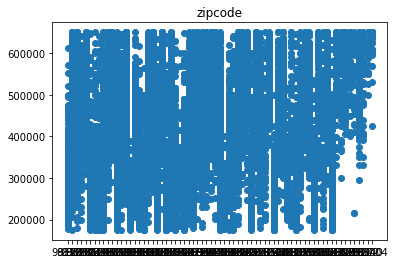

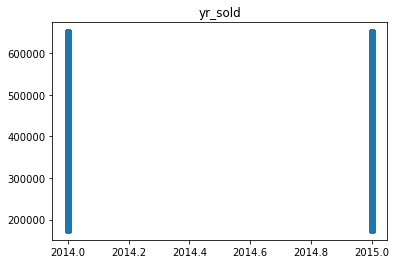

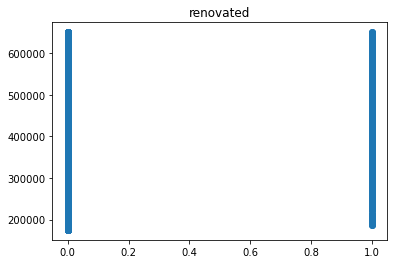

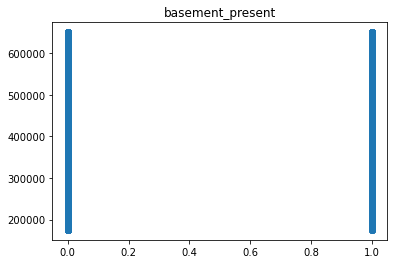

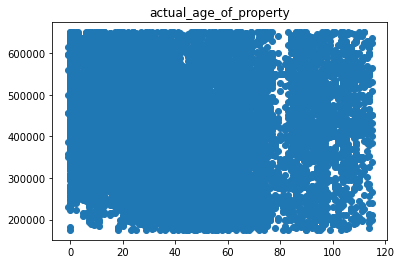

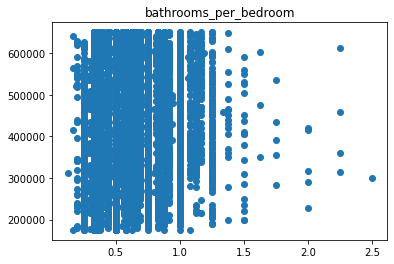

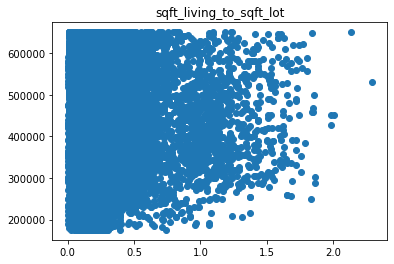

In [77]:
# Check data one more time 

for col in df.columns:
    plt.scatter(df[col], df[TARGET])
    plt.title(col)
    plt.show()

# Start Building Model 
- Create dependent(y) and independent(x) variables 
- Create Train and Test data subsets

## Create TARGET and Independent Variables 

In [78]:
# Dependent variable(y) is price as previously defined as TARGET
# Independent variables(X) are all variables that are not price  

y = df[TARGET]
X = df.drop(columns=[TARGET])
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,yr_sold,renovated,basement_present,actual_age_of_property,bathrooms_per_bedroom,sqft_living_to_sqft_lot
id,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,1.0,0.0,3,7,1180,1955,98178,2014,0,0,59,0.333333,0.208850
6414100192,3,2.25,2570,2.0,0.0,3,7,2170,1951,98125,2014,1,1,63,0.750000,0.354874
5631500400,2,1.00,770,1.0,0.0,3,6,770,1933,98028,2015,0,0,82,0.500000,0.077000
2487200875,4,3.00,1960,1.0,0.0,5,7,1050,1965,98136,2014,0,1,49,0.750000,0.392000
1954400510,3,2.00,1680,1.0,0.0,3,8,1680,1987,98074,2015,0,0,28,0.666667,0.207921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,3.0,0.0,3,8,1530,2009,98103,2014,0,0,5,0.833333,1.352785
6600060120,4,2.50,2310,2.0,0.0,3,8,2310,2014,98146,2015,0,0,1,0.625000,0.397385
1523300141,2,0.75,1020,2.0,0.0,3,7,1020,2009,98144,2014,0,0,5,0.375000,0.755556


## Create Train and Test Data Subsets

In [79]:
# Create Train and Test data subsets using train_test_split
# Check shape of each data set 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11937, 16), (3979, 16), (11937,), (3979,))

In [80]:
# Check percentage of data that is Train data 
# Train data is 75% of data; Test data is 25% of data 

11_937/(11_937+3979)

0.75

In [81]:
# Reset index on Train and Test data sets 

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Create Number and Category Column Variables 

In [82]:
# Create variable for "Number" columns (integers, floats)
# Create variable for "Category" columns (objects, strings)
# Check Category Columns

NUMBER_COLS = X_train.select_dtypes('number').columns
CATEGORY_COLS = X_train.select_dtypes('object').columns
CATEGORY_COLS

Index(['zipcode'], dtype='object')

## One Hot Encode Category Columns (zipcode)

In [83]:
# ONE HOT ENCODE 

ohe = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = ohe.fit_transform(X_train[CATEGORY_COLS])
X_test_ohe = ohe.transform(X_test[CATEGORY_COLS])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(CATEGORY_COLS))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(CATEGORY_COLS))

X_train_ohe.columns = [c.lower() for c in X_train_ohe]
X_test_ohe.columns = [c.lower() for c in X_test_ohe]

In [84]:
# Check one hot encoding of zipcodes

X_train_ohe.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Concatenate Number Columns with One Hot Encoded Columns 

X_train_raw = pd.concat([X_train[NUMBER_COLS], 
                         X_train_ohe], 
                        axis=1)
X_test_raw = pd.concat([X_test[NUMBER_COLS], 
                        X_test_ohe], 
                       axis=1)

## Scale the Data

In [86]:
# Scale the Data using StandardScaler()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[NUMBER_COLS])
X_test_scaled = scaler.transform(X_test[NUMBER_COLS])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[NUMBER_COLS].columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[NUMBER_COLS].columns)

In [87]:
# Check the shape of the data

X_train_scaled.shape, X_test_scaled.shape

((11937, 15), (3979, 15))

In [88]:
# Concatenate Scaled data with One Hot Encoded data

X_train_scaled = pd.concat([X_train_scaled, 
                            X_train_ohe], 
                           axis=1)
X_test_scaled = pd.concat([X_test_scaled, 
                           X_test_ohe], 
                          axis=1)

In [89]:
# Check X_train_scaled data

X_train_scaled

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,yr_built,yr_sold,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-1.484449,-1.457646,-1.647388,-0.796457,-0.034267,-0.633146,-1.566432,-1.329157,-1.126758,-0.690906,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.914667,0.465379,1.044130,1.066624,-0.034267,-0.633146,0.855183,1.521508,0.432630,-0.690906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.914667,0.849984,0.489515,-0.796457,-0.034267,2.512689,0.855183,-0.223444,-0.169861,-0.690906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.914667,-1.457646,-1.272207,-0.796457,-0.034267,0.939771,-1.566432,-0.931792,-0.559708,1.447374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.484449,-1.457646,-0.652342,-0.796457,-0.034267,-0.633146,-0.355625,-1.070006,-0.843233,-0.690906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11932,2.114224,1.234589,2.185987,-0.796457,-0.034267,0.939771,0.855183,0.052984,0.078224,-0.690906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11933,2.114224,0.849984,2.626417,-0.796457,-0.034267,0.939771,0.855183,0.260305,-0.417945,-0.690906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11934,-0.284891,0.465379,-0.211911,-0.796457,-0.034267,0.939771,0.855183,0.191198,-0.347064,-0.690906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11935,-0.284891,0.465379,-0.521844,1.066624,-0.034267,-0.633146,0.855183,-0.810854,0.468071,-0.690906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODELS

## Model 1: Everything 
- Used for exploration 

In [90]:
model1 = sm.OLS(y_train, X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              4748.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):                        0.00
Time:                        02:43:06   Log-Likelihood:                     -1.5044e+05
No. Observations:               11937   AIC:                                  3.011e+05
Df Residuals:                   11855   BIC:                                  3.017e+05
Df Model:                          82                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
bedrooms                -6172.9831   1884.335     -3.276      0.001   -9866.589   -2479.378
bathrooms                1.152e+04   2417.799      4.764      0.000    6779.616    1.63e+04
sqft_living              3.574e+04   2188.438     16.329      0.000    3.14e+04       4e+04
floors                    168.1531   1204.053      0.140      0.889   -2191.989    2528.295
waterfront               5070.2270    686.537      7.385      0.000    3724.503    6415.951
condition                1.055e+04    749.322     14.075      0.000    9078.117     1.2e+04
grade                    2.384e+04    995.442     23.950      0.000    2.19e+04    2.58e+04
sqft_above               2.552e+04   2267.452     11.257      0.000    2.11e+04       3e+04
yr_built                 2846.8756    615.682      4.624      0.000    1640.038    4053.713
yr_sold                  8161.1261    666.448     12.246      0.000    6854.779    9467.473
renovated                1154.3403    687.611      1.679      0.093    -193.490    2502.171
basement_present         8097.3374   1289.917      6.277      0.000    5568.889    1.06e+04
actual_age_of_property  -2711.2991    615.432     -4.406      0.000   -3917.648   -1504.951
bathrooms_per_bedroom   -3861.5692   2169.887     -1.780      0.075   -8114.903     391.765
sqft_living_to_sqft_lot -2.378e+04   1160.847    -20.488      0.000   -2.61e+04   -2.15e+04
zipcode_98002             2.56e+05   6092.954     42.011      0.000    2.44e+05    2.68e+05
zipcode_98003            2.659e+05   5202.841     51.099      0.000    2.56e+05    2.76e+05
zipcode_98004            6.534e+05   1.81e+04     36.149      0.000    6.18e+05    6.89e+05
zipcode_98005            5.436e+05   1.17e+04     46.281      0.000    5.21e+05    5.67e+05
zipcode_98006            4.771e+05   6302.350     75.695      0.000    4.65e+05    4.89e+05
zipcode_98007             4.93e+05   8428.213     58.491      0.000    4.76e+05    5.09e+05
zipcode_98008            4.924e+05   5710.059     86.240      0.000    4.81e+05    5.04e+05
zipcode_98010             3.33e+05   9046.885     36.813      0.000    3.15e+05    3.51e+05
zipcode_98011             4.19e+05   6516.273     64.306      0.000    4.06e+05    4.32e+05
zipcode_98014            3.619e+05   8978.903     40.301      0.000    3.44e+05    3.79e+05
zipcode_98019            3.633e+05   6181.217     58.778      0.000    3.51e+05    3.75e+05
zipcode_98022            2.862e+05   5623.784     50.894      0.000    2.75e+05    2.97e+05
zipcode_98023            2.479e+05   3865.105     64.128      0.000     2.4e+05    2.55e+05
zipcode_98024            4.067e+05   1.08e+04     37.651      0.000    3.86e+05    4.28e+05
zipcode_98027            4.523e+05   502

In [91]:
# Results sorted by coefficients descending 

results1_as_html = model1.summary().tables[1].as_html()
results1 = pd.read_html(results1_as_html, header=0, index_col=0)[0]
results1.sort_values('coef', ascending=False)#.set_option('display.max_rows', None)

,coef,std err,t,P>|t|,[0.025,0.975]
zipcode_98004,653400.0000,18100.000,36.149,0.000,618000.000,689000.000
zipcode_98109,623200.0000,14100.000,44.197,0.000,596000.000,651000.000
zipcode_98112,613800.0000,10500.000,58.382,0.000,593000.000,634000.000
zipcode_98102,612000.0000,12600.000,48.402,0.000,587000.000,637000.000
zipcode_98119,609600.0000,10100.000,60.553,0.000,590000.000,629000.000
...,...,...,...,...,...,...
floors,168.1531,1204.053,0.140,0.889,-2191.989,2528.295
actual_age_of_property,-2711.2991,615.432,-4.406,0.000,-3917.648,-1504.951
bathrooms_per_bedroom,-3861.5692,2169.887,-1.780,0.075,-8114.903,391.765
bedrooms,-6172.9831,1884.335,-3.276,0.001,-9866.589,-2479.378


*****Check Linear Model Assumptions**

**1. Linearity** 

**2. Residual Normality** <br>
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True) <br>
Omnibus Value

**3. Homoskedasticity** <br>
Durbin-Watson: range of 1.5 to 2.5 is relatively normal

**4. Multicollinearity** <br>
VIF (variance_inflation_factor())

**Also check p-value** <br>
A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random).

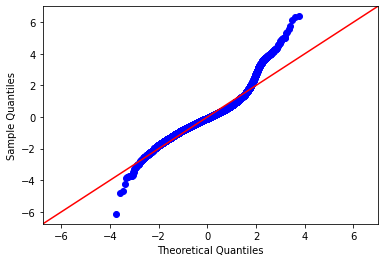

In [92]:
sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True);

## Model Without Zipcode

In [93]:
# Model without zipcodes 

[c for c in X_train_scaled.columns if not c.startswith('zipcode')]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_sold',
 'renovated',
 'basement_present',
 'actual_age_of_property',
 'bathrooms_per_bedroom',
 'sqft_living_to_sqft_lot']

In [94]:
model = sm.OLS(y_train, X_train_scaled[[c for c in X_train_scaled.columns if not c.startswith('zipcode')]]).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                         Results: Ordinary least squares
=================================================================================================================================================
Model:                                        OLS                                   Adj. R-squared (uncentered):                      0.931      
Dependent Variable:                           price                                 AIC:                                              311040.1773
Date:                                         2021-10-25 02:43                      BIC:                                              311143.6008
No. Observations:                             11937                                 Log-Likelihood:                                   -1.5551e+05
Df Model:                                     14                                    F-statistic:                                      1.149e+04  
Df Residuals:                                 11923                                 Prob (F-statistic):                               0.00       
R-squared (uncentered):                       0.931                                 Scale:                                            1.2116e+10 
-------------------------------------------------------------------------------------------------------------------------------------------------
                                  Coef.                    Std.Err.            t     P>|t|            [0.025                     0.975]          
-------------------------------------------------------------------------------------------------------------------------------------------------
bedrooms                                17615.5331               2846.1182    6.1893 0.0000                 12036.6776                 23194.3887
bathrooms                               20311.1304               3656.1372    5.5554 0.0000                 13144.5056                 27477.7553
sqft_living                             30323.9936               3303.4859    9.1794 0.0000                 23848.6230                 36799.3643
floors                                   8378.1358               1780.8126    4.7047 0.0000                  4887.4530                 11868.8187
waterfront                             -10334.1618               1010.2286  -10.2295 0.0000                -12314.3745                 -8353.9491
condition                               -3750.4140               1098.4997   -3.4141 0.0006                 -5903.6524                 -1597.1756
grade                                   63307.8710               1424.7459   44.4345 0.0000                 60515.1368                 66100.6053
sqft_above                                979.7443               3400.8819    0.2881 0.7733                 -5686.5385                  7646.0272
yr_built                -52769451751732305920.0000 133496722529767488.0000 -395.2865 0.0000 -53031127083900076032.0000 -52507776419564535808.0000
yr_sold                    874620052692505344.0000   2212623148760089.7500  395.2865 0.0000    870282950728936192.0000    878957154656074496.0000
renovated                               -5078.9964               1037.7459   -4.8943 0.0000                 -7113.1475                 -3044.8453
basement_present                        19891.6878               1947.2002   10.2155 0.0000                 16074.8581                 23708.5174
actual_age_of_property  -52775505422235402240.0000 133512037170049296.0000 -395.2865 0.0000 -53037210773593956352.0000 -52513800070876848128.0000
bathrooms_per_bedroom                    6228.6157               3282.2362    1.8977 0.0578                  -205.1021                 12662.3335
sqft_living_to_sqft_lot                 19088.2496               1495.6758   12.7623 0.0000                 16156.4813                 22020.0180
------------------------------------------------------------------

In [95]:
model = sm.OLS(y_train, X_train_scaled).fit()

results_as_html = model.summary().tables[1].as_html()
results = pd.read_html(results_as_html, header=0, index_col=0)[0]
results.sort_values('coef', ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
zipcode_98004,653400.0000,18100.000,36.149,0.000,618000.000,689000.000
zipcode_98109,623200.0000,14100.000,44.197,0.000,596000.000,651000.000
zipcode_98112,613800.0000,10500.000,58.382,0.000,593000.000,634000.000
zipcode_98102,612000.0000,12600.000,48.402,0.000,587000.000,637000.000
zipcode_98119,609600.0000,10100.000,60.553,0.000,590000.000,629000.000
...,...,...,...,...,...,...
floors,168.1531,1204.053,0.140,0.889,-2191.989,2528.295
actual_age_of_property,-2711.2991,615.432,-4.406,0.000,-3917.648,-1504.951
bathrooms_per_bedroom,-3861.5692,2169.887,-1.780,0.075,-8114.903,391.765
bedrooms,-6172.9831,1884.335,-3.276,0.001,-9866.589,-2479.378


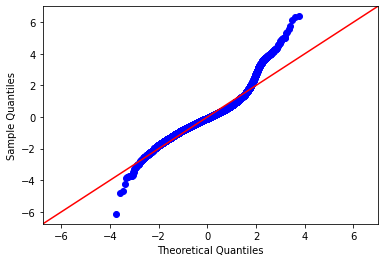

In [96]:
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

In [97]:
# Check for Multicollinearity
# Revisit

def create_vif_dct(dataframe, const_col_name='const'):
    
    if const_col_name not in dataframe.columns:
        dataframe = sm.add_constant(dataframe)
        
    # Dummy-checking.
    df = dataframe.select_dtypes('number')
    if df.shape != dataframe.shape:
        warnings.warn('\n\nThere are non-numerical columns trying to be passed!\nThese have automatically been removed.\n')
    if df.isna().sum().any():
        raise ValueError('There may not be any missing values in the dataframe!')
        
    # Creating VIF Dictionary.
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(df.columns)):
        vif = variance_inflation_factor(df.values, i)
        v = df.columns[i]
        vif_dct[v] = vif

    return vif_dct

## Model 2: Price and Square Feet Living

In [98]:
# Model 2: Price and Square Ft Living 

model2 = sm.OLS(y_train, X_train['sqft_living']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          9.739e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):                        0.00
Time:                        02:43:07   Log-Likelihood:                     -1.5824e+05
No. Observations:               11937   AIC:                                  3.165e+05
Df Residuals:                   11936   BIC:                                  3.165e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   208.9138      0.669    312.078      0.000     207.602     210.226
==============================================================================
Omnibus:                       52.481   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.304
Skew:                           0.025   Prob(JB):                     2.92e-09
Kurtosis:                       2.724   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

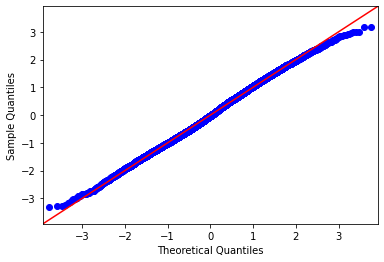

In [99]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

## Model 3: Price and Bedrooms

In [100]:
# Model 3: Price and Bedrooms

model3 = sm.OLS(y_train, X_train['bedrooms']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          8.732e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):                        0.00
Time:                        02:43:07   Log-Likelihood:                     -1.5882e+05
No. Observations:               11937   AIC:                                  3.176e+05
Df Residuals:                   11936   BIC:                                  3.177e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.175e+05    397.608    295.503      0.000    1.17e+05    1.18e+05
==============================================================================
Omnibus:                       59.733   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.074
Skew:                           0.060   Prob(JB):                     9.89e-11
Kurtosis:                       2.721   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

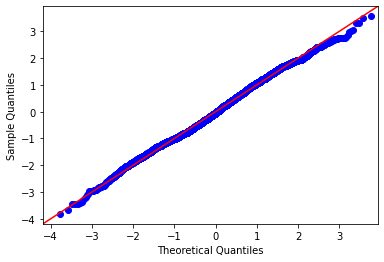

In [101]:
sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True);

## Model 4: Price and Bathrooms 

In [102]:
# Model 4: Price and Bathrooms

model4 = sm.OLS(y_train, X_train['bathrooms']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                          8.373e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):                        0.00
Time:                        02:43:07   Log-Likelihood:                     -1.5904e+05
No. Observations:               11937   AIC:                                  3.181e+05
Df Residuals:                   11936   BIC:                                  3.181e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   1.908e+05    659.483    289.356      0.000     1.9e+05    1.92e+05
==============================================================================
Omnibus:                       50.150   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.364
Skew:                           0.134   Prob(JB):                     3.15e-11
Kurtosis:                       2.841   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

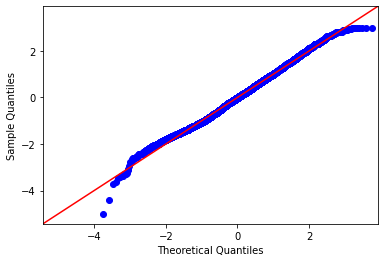

In [103]:
sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True);

## Model 5: Price and Renovated

In [104]:
# Model 5: Price and Renovated

model5 = sm.OLS(y_train, X_train['renovated']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.022
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              267.0
Date:                Mon, 25 Oct 2021   Prob (F-statistic):                    2.22e-59
Time:                        02:43:07   Log-Likelihood:                     -1.7133e+05
No. Observations:               11937   AIC:                                  3.427e+05
Df Residuals:                   11936   BIC:                                  3.427e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
renovated   4.089e+05    2.5e+04     16.341      0.000     3.6e+05    4.58e+05
==============================================================================
Omnibus:                      441.005   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              610.986
Skew:                          -0.382   Prob(JB):                    2.12e-133
Kurtosis:                       3.804   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

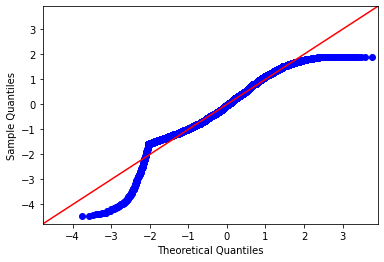

In [105]:
sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True);

# Evaluation and Conclusions

After building models to evaluate the relationship between price and square feet, bedrooms, bathrooms, and renovation status, we can offer guidance to new home buyers in WA State about the expectation of price relative to square feet of living, bedrooms, and bathrooms. 

**** Important note: the results are best suited for home buyers seeking homes with a maximum of 6 bedrooms,4000 square feet, and a budget of ranging from \\$175,000 to \\$650,000

**Conclusions** 
- With the highest correlation (r-squared: 0.891) of our models, our model for price to square feet shows: **in King County, WA, every additional square feet of space costs approximately \\$209** 
- Model for price to bedrooms shows: **every additional bedroom costs approximately \\$117,500** 
- Model for price to bathrooms shows: **every additional bathroom costs approximately \\$190,800** 

# Future Work 

**Future work:** 
* Refine existing models and expand dataset for different types of home buyers 
* Explore relationship of price to zip code 
* Build models for Suburbs (Medina, WA) vs. City (Seattle, WA)
* Build more comprehensive models considering other factors such as location, renovations, waterfront view 